En este libro de jupyter vamos a realizar una pequeña actividad cuyo fin es explorar la manera en la que se pueden representar y subir grafos a un archivo Python.

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

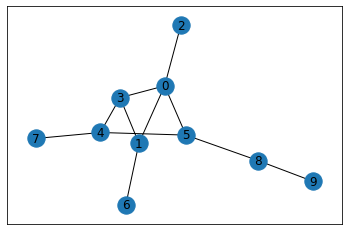

In [ ]:
# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G1
nx.draw_networkx(G1)

##Actividad 1

Lista de adyacencia.

In [ ]:
# importamos el archivo
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

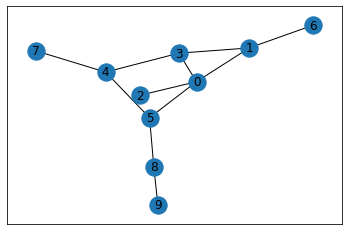

In [ ]:
# graficamos el grafo
nx.draw_networkx(G2)

##Actividad 2
Matriz de adyacencia

In [ ]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
# verificar el grafo
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

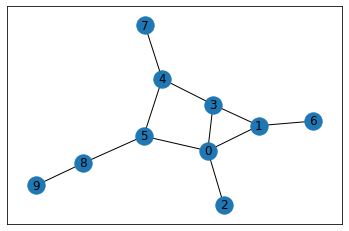

In [ ]:
# graficar
nx.draw_networkx(G3)

##Lista de Enlacces

In [ ]:
# importar los datos
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])
G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

{('0', '1'): Text(0.09025377600230529, -0.019593336646945833, '4'),
 ('0', '2'): Text(0.11872517949445119, -0.43804788372567116, '3'),
 ('0', '3'): Text(0.191060423483475, -0.14823338822093984, '2'),
 ('0', '5'): Text(-0.02797282727611341, -0.13783426087074363, '6'),
 ('1', '3'): Text(0.19287368484262737, 0.06784857024199083, '2'),
 ('1', '6'): Text(0.060394951744639755, 0.39857941600008695, '5'),
 ('3', '4'): Text(0.33183149987702726, 0.04187808147560343, '3'),
 ('4', '7'): Text(0.560360246339989, 0.21777159384162828, '2'),
 ('5', '4'): Text(0.11279824911743885, 0.05227720882579963, '1'),
 ('5', '8'): Text(-0.38632054374097813, -0.07167076233795823, '6'),
 ('8', '9'): Text(-0.8141274591432883, -0.12791077213423718, '1')}

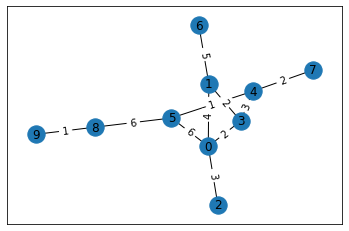

In [ ]:
# graficar
pos = nx.spring_layout(G4)
nx.draw_networkx(G4, pos)
labels = nx.get_edge_attributes(G4,'Weight')
nx.draw_networkx_edge_labels(G4,pos,edge_labels=labels)

##Pandas

Es posible subir los grafos en un DataFrame, pero sólo si es en la forma de lista de enlaces.

In [ ]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [ ]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

{(0, 1): Text(0.04206412536583799, -0.059022577750696276, '4'),
 (0, 2): Text(-0.25174478864639355, 0.14205675271205243, '3'),
 (0, 3): Text(-0.1074367233361386, -0.1025223052789723, '2'),
 (0, 5): Text(-0.025095017682202098, 0.1478299985189926, '6'),
 (1, 3): Text(0.024070632554167568, -0.21687239367769862, '2'),
 (1, 6): Text(0.2996358705682243, -0.2382071420579369, '5'),
 (3, 4): Text(-0.18152901175488212, -0.36001226112007856, '3'),
 (4, 7): Text(-0.30902744441767904, -0.6565734473953778, '2'),
 (5, 4): Text(-0.0991873061009456, -0.1096599573221137, '1'),
 (5, 8): Text(0.11101947713974107, 0.38290989734424985, '6'),
 (8, 9): Text(0.30422487298972056, 0.7627436541492723, '1')}

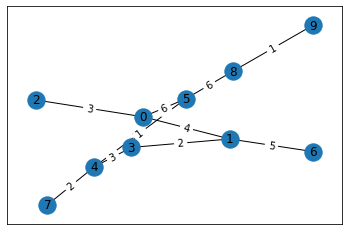

In [ ]:
# graficar
pos = nx.spring_layout(G5)
nx.draw_networkx(G5, pos)
labels = nx.get_edge_attributes(G5,'weight')
nx.draw_networkx_edge_labels(G5,pos,edge_labels=labels)